In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import skimage
import tifffile
import sys

import scipy
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import warnings

import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
%reload_ext autoreload
%autoreload 2
%aimport
warnings.filterwarnings('ignore')

os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
sys.path.insert(1, os.getenv('MOMAPS_HOME'))
from src.common.lib.feature_spectra_utils import *
from src.common.lib.image_metrics import improve_brightness

Modules to reload:
all-except-skipped

Modules to skip:



In [5]:
SAVE_PATH = "./manuscript/sup_fig1/FS_workflow/"

In [4]:
untreated_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#52C5D5"])
stress_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#F7810F"])
MODEL_PATH = '/home/labs/hornsteinlab/Collaboration/MOmaps/outputs/models_outputs_batch78_nods_tl_ep23/'
EMBEDDINGS_FOLDER = os.path.join(MODEL_PATH, 'embeddings', 'neurons', 'vqindhist1')

# PANEL A #

In [6]:
# stuff for scalr bar
raw_image_path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s396.tif"

with tifffile.TiffFile(raw_image_path) as tif:
    metadata = tif.pages[0].tags
    site_pixel_size_in_um = metadata.get('UIC1tag').value['XCalibration']
tile_scalebar_length_in_um = 10
tile_pixel_size_in_um = site_pixel_size_in_um * 1.28
tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um


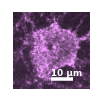

In [32]:
purple_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#f29dff"])
#R11_w3confCy5_s365.tif"
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s347.tif"
image = cv2.imread(path, cv2.IMREAD_ANYDEPTH)
vmin, vmax = np.percentile(image, q=(0.5, 99.9))
img_scaled = skimage.exposure.rescale_intensity(
                                                image[12:1012, 12:1012],
                                                in_range=(vmin, vmax),
                                                out_range=np.float32
    )
dpi=127
fig = plt.figure(figsize=(100/dpi,100/dpi), dpi=dpi) #100/dpi,100/dpi
improved = improve_brightness(img_scaled[600:728,652:780], contrast_factor=1, brightness_factor=0.1)
plt.imshow(improved, cmap=purple_colormap, vmin=0, vmax=1)

plt.axis('off')
plt.margins = (0,0)
plt.hlines(y=110, xmin=100-tile_scalebar_length_in_pixels, xmax=100, color='white', linewidth=2)
plt.text(y = 105, x = 100-tile_scalebar_length_in_pixels, 
         s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=5, color='white', weight=1000)
plt.savefig(os.path.join(SAVE_PATH, "A_tile.eps"),bbox_inches='tight', dpi=dpi, pad_inches=0)
# plt.show()

# PANEL B #

## tiles ##

In [79]:
def plot_tile(path, tile_indices, cmap, marker, condition):
    site = np.load(path)

    for tile_index in tile_indices:
        fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
        plt.imshow(site[tile_index,:,:,0], cmap=cmap,
                  vmin=0, vmax=1)
        plt.axis('off')
        plt.margins = (0,0)
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
        plt.savefig(os.path.join(SAVE_PATH, f"B_tile_{marker}_{condition}_{tile_index}.eps"),
                    dpi=127, bbox_inches='tight', pad_inches=0)
        #plt.show()

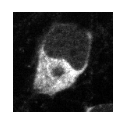

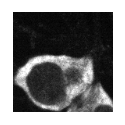

In [102]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6_16bit_no_downsample/WT/Untreated/G3BP1/rep2_R11_w3confCy5_s369_panelA_WT_processed.npy"
tile_indices = [2,5] # original 2
plot_tile(path, tile_indices, 'binary_r', 'G3BP1', 'Untreated')


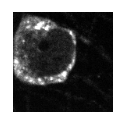

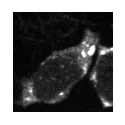

In [100]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6_16bit_no_downsample/WT/stress/G3BP1/rep1_R11_w3confCy5_s30_panelA_WT_processed.npy"

tile_indices = [4,3] # original 2
plot_tile(path, tile_indices, 'binary_r', 'G3BP1', 'stress')

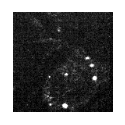

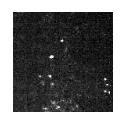

In [101]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6_16bit_no_downsample/WT/Untreated/DCP1A/rep2_R11_w2confmCherry_s334_panelE_WT_processed.npy"

tile_indices = [4,5] # original 2
plot_tile(path, tile_indices, 'binary_r', 'DCP1A', 'Untreated')

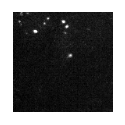

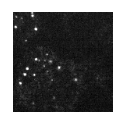

In [104]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6_16bit_no_downsample/WT/stress/DCP1A/rep2_R11_w2confmCherry_s144_panelE_WT_processed.npy"

tile_indices = [2,3] # original 2
plot_tile(path, tile_indices, 'binary_r', 'DCP1A', 'stress')

## load histograms and create heatmap##

In [4]:
vqindhist, labels, paths = load_multiple_vqindhists(batches = [7,8], embeddings_folder = EMBEDDINGS_FOLDER, 
                                                    datasets = ['trainset','valset','testset'])
hist_df, hist_df_with_path = create_vqindhists_df(vqindhist, labels, paths)



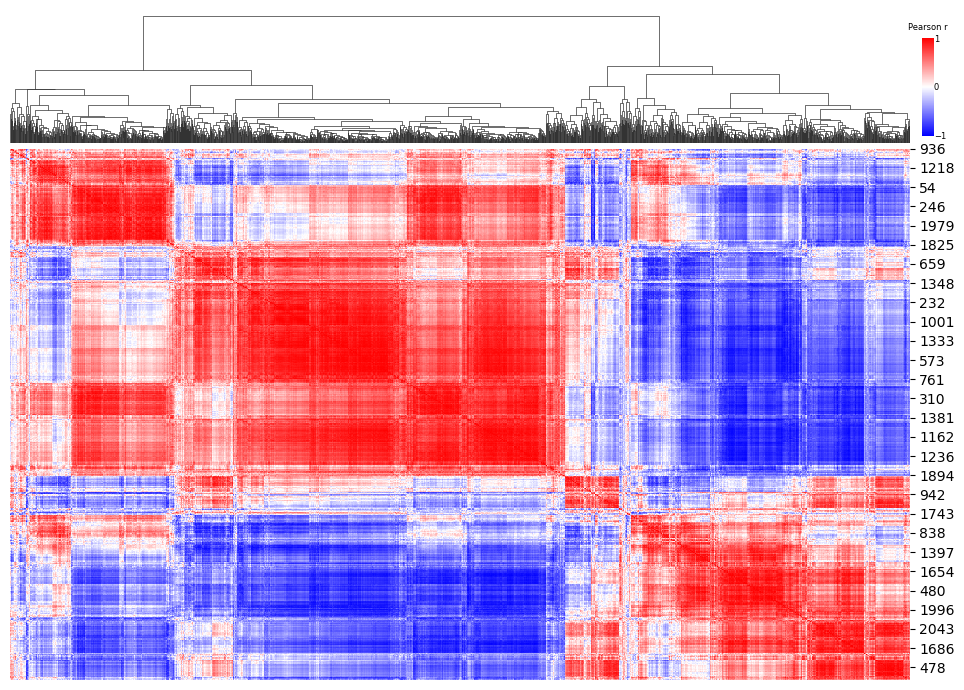

In [5]:
hist_df_wt = hist_df[hist_df.label.str.contains('WT')]
hist_df_wt = hist_df_wt[hist_df_wt.label.str.contains('DCP1A|G3BP1', regex=True)] #Calreticulin|NEMO|PML|G3BP1|TDP43|PURA
clustermap, corr = create_codebook_heatmap(hist_df_wt)

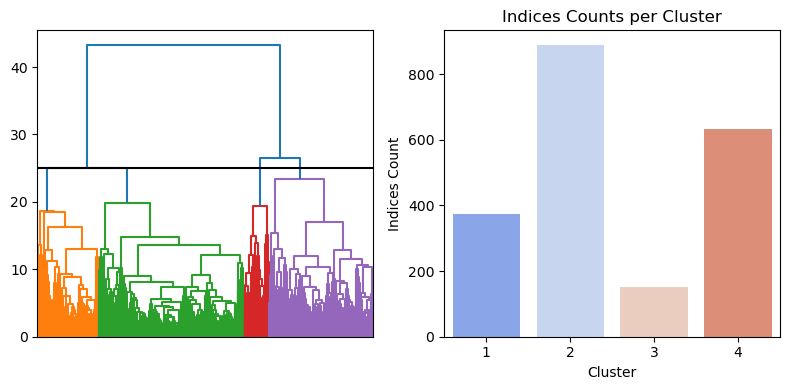

In [6]:
corr_with_clusters = cut_dendrogram_get_clusters(clustermap, corr, cutoff = 25)

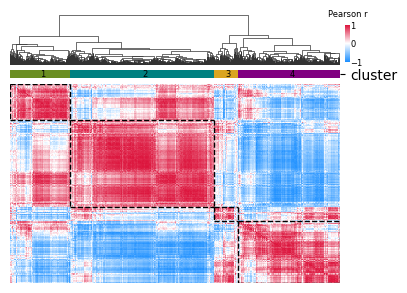

In [66]:
cmap = LinearSegmentedColormap.from_list('my_color', ['dodgerblue', 'white', 'crimson'], N=256)

hir_order = plot_heatmap_with_clusters_supp_1A(corr_with_clusters, to_save=True, 
                                               filename="B_heatmap_new_frames.tiff",save_path=SAVE_PATH, figsize=(5,3),
                                              cmap=cmap)

In [67]:
hist_df_wt_agg = hist_df_wt.copy()
hist_df_wt_agg['label'] = hist_df_wt_agg['label'].str.split("_").str[0:3:2].apply(lambda x: "_".join(x)) # merging different batches and reps -> label == marker

In [68]:
hist_df_wt_agg['label'] = hist_df_wt_agg.label.str.replace('DCP1A', 'Organelle 1')
hist_df_wt_agg['label'] = hist_df_wt_agg.label.str.replace('G3BP1', 'Organelle 2')
hist_df_wt_agg['label'] = hist_df_wt_agg.label.str.replace('Untreated', 'Condition 1')
hist_df_wt_agg['label'] = hist_df_wt_agg.label.str.replace('stress', 'Condition 2')


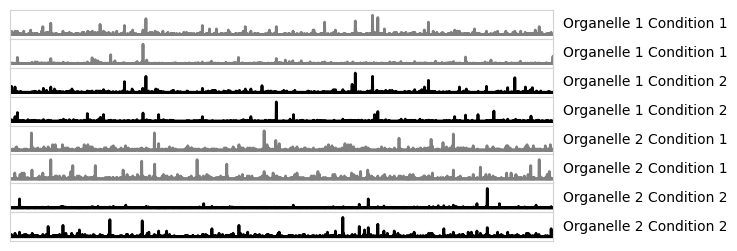

In [105]:
def choose_two_rows(group):
    return group.sample(n=2, random_state=42)

from matplotlib.colors import LinearSegmentedColormap

# Apply the function to each group defined by the 'label' column
randomly_selected_rows = hist_df_wt_agg.groupby('label', group_keys=False).apply(choose_two_rows)


plot_hists_supp_1A(randomly_selected_rows, ['Organelle 1','Organelle 2'], corr_with_clusters, hierarchical_order=None, sort=False, color_by_cond=True, plot_delta=False, to_save=True, to_mean=False,
                    figsize=(7,3), first_cond='Condition 1', second_cond='Condition 2', save_path=SAVE_PATH, filename="B_8_hists_unorder.eps", colormap_name='black', plot_cluster_lines=False,
                  colors = {"Condition 1": "gray", 'Condition 2': "black"})

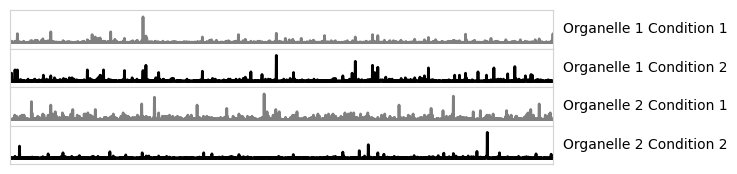

In [106]:
plot_hists_supp_1A(randomly_selected_rows, ['Organelle 1','Organelle 2'], corr_with_clusters, hierarchical_order=None, sort=False, color_by_cond=True, plot_delta=False, to_save=True, to_mean=True,
                    figsize=(7,2), first_cond='Condition 1', second_cond='Condition 2', save_path=SAVE_PATH, filename="B_4_hists_mean_unorder.eps", colormap_name='black', plot_cluster_lines=False,
                   colors = {"Condition 1": "gray", 'Condition 2': "black"})

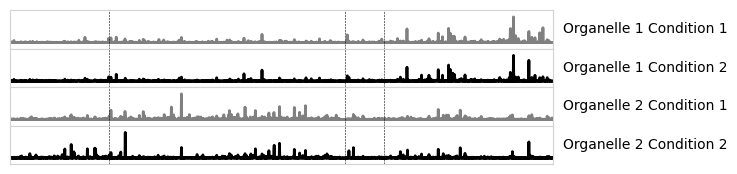

In [107]:

plot_hists_supp_1A(hist_df_wt_agg, ['Organelle 1','Organelle 2'], corr_with_clusters, hierarchical_order=hir_order, sort=True, color_by_cond=True, plot_delta=False, to_save=True, colormap_name='viridis',
                       figsize=(7,2), first_cond='Condition 1', second_cond='Condition 2', save_path=SAVE_PATH, filename="B_4_hists_order.eps", colors = {"Condition 1": "gray", 'Condition 2': "black"})

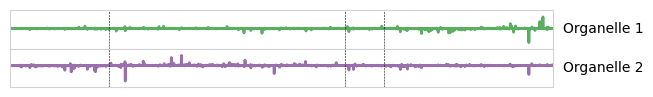

In [108]:
plot_hists_supp_1A(hist_df_wt_agg, ['Organelle 1','Organelle 2'], corr_with_clusters, hierarchical_order=hir_order, 
                   sort=True, color_by_cond=False, plot_delta=True, to_save=True, colormap_name='PRGn',
                       figsize=(7,1), first_cond='Condition 1', second_cond='Condition 2', save_path=SAVE_PATH, 
                   filename="B_2_hists_delta.eps")